In [1]:
# A - Q1

from numpy.random import default_rng
rng = default_rng()

def demand_estimate(days, k=1, p=0.02):
    total_toilet_paper = []
    for day in range(days):
        for person in range(k):
            sick_or_healthy = rng.choice(['Sick', 'Healthy'],p=[p, 1-p])
            if sick_or_healthy == 'Sick':
                person_toilet_paper = rng.uniform(20, 40)
            else: # sick_or_healthy == 'Healthy'
                person_toilet_paper = rng.uniform(5, 10)
            total_toilet_paper.append(person_toilet_paper)
    return sum(total_toilet_paper)

In [3]:
# Test code 1

demand_estimate(7)

# Output should be: 48.609976093943594

52.26233525916763

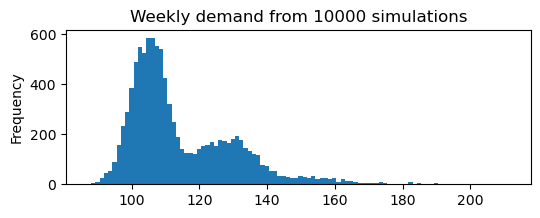

Mean: 114.66 	Std: 15.97


In [55]:
import pandas as pd
import matplotlib.pyplot as plt

estimates=pd.Series([demand_estimate(7, 2, 0.03) for i in range(10000)])
estimates.plot(kind='hist',title='Weekly demand from 10000 simulations',bins=100,figsize=(6,2))
plt.show()
print(f'Mean: {estimates.mean():.2f} \tStd: {estimates.std():.2f}')

# Output should be: Mean: 114.81    Std: 16.08

In [57]:
# A - Q2

demand = [20,35,60,20,10,30,50,30,20,10]
s = 100
remaining = s
sold_list = []
good_days = 0

for i in range(len(demand)):
    if i > 0 and i % 7 == 0:
        remaining += s

    if demand[i] <= remaining:
        sold = demand[i]
        good_days += 1
    else: # demand[i] > remaining
        sold = remaining

    remaining -= sold
    sold_list.append(sold)

served_proportion = sum(sold_list) / sum(demand)
good_days_proportion = good_days / len(demand)

print(f'The proportion of demand that is served: {served_proportion}')
print(f'The proportion of days in which all demand is served: {good_days_proportion}')    

The proportion of demand that is served: 0.5614035087719298
The proportion of days in which all demand is served: 0.5


In [59]:
def supply_simulation(demand, s):
    remaining = s
    sold_list = []
    good_days = 0

    for i in range(len(demand)):
        if i > 0 and i % 7 == 0:
            remaining += s

        if demand[i] <= remaining:
            sold = demand[i]
            good_days += 1
        else:
            sold = remaining

        remaining -= sold
        sold_list.append(sold)

    served_proportion = sum(sold_list) / sum(demand)
    good_days_proportion = good_days / len(demand)

    return served_proportion, good_days_proportion

In [61]:
# Test code 1
s,g=supply_simulation([20,35,60,20,10,30,50,30,20,10],100)
print('Proportion of total demand that is served: ',s)
print('Proportion of days in which all demand is served: ',g)

# Output should be: 
# Proportion of total demand that is served:  0.5614035087719298
# Proportion of days in which all demand is served:  0.5

Proportion of total demand that is served:  0.5614035087719298
Proportion of days in which all demand is served:  0.5


In [63]:
# Test code 2
demand=([10]*7)+([20]*3)
supply_simulation(demand,70)

# Output should be: (1.0, 1.0)

(1.0, 1.0)

In [129]:
# Test code 3
demand=([20]*10)
supply_simulation(demand,70)

# Output should be: (0.65, 0.6)

(0.65, 0.6)

In [185]:
# A - Q3: Need to work > Done

from numpy.random import default_rng
rng = default_rng()

import math

def travel_distance(locations, probabilities):
    home = [0, 0]
    total_distance = 0

    for i in range(len(locations)):
        location = locations[i]
        if i == 0:
            location_before = home
        else:
            location_before = locations[i - 1]
        
        # Calculate the distance to the current store
        travel_distance = math.sqrt((location[0] - location_before[0]) ** 2 + (location[1] - location_before[1]) ** 2)
        total_distance += travel_distance

        probability = probabilities[i]
        # Check if the store has toilet paper
        check_stock = rng.choice(['In-stock', 'Out-of-stock'], p=[probability, 1-probability])
        if check_stock == 'In-stock' or i == len(locations) - 1:
            # Return home if toilet paper is found
            go_back_distance = math.sqrt((location[0] - home[0]) ** 2 + (location[1] - home[1]) ** 2)
            total_distance += go_back_distance
            break
    
    return total_distance

In [173]:
# Test code 1
travel_distance([[3,4],[-3,4],[-8,6]],[0,1,1])
# Output should be: 16.0

16.0

In [175]:
# Test code 2
print(travel_distance([[3,4],[-3,4],[-8,6]],[1,1,0]))
# Output should be: 10.0

10.0


In [177]:
# Test code 3
travel_distance([[3,4],[-3,4],[-8,6]],[0,0,0])
# Output should be: 26.385164807134505

26.385164807134505

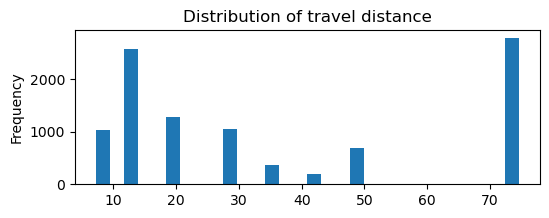

Mean: 35.82
Standard deviation: 26.33


In [181]:
# Test code 4
locations=[[3,2],[5,4],[7,-1],[5,-8],[-5,-4],[-6,2],[-8,4],[-20,10]]
probabilities=[0.1,0.3,0.2,0.2,0.1,0.05,0.2,0.05]

import pandas as pd
import matplotlib.pyplot as plt
distances=pd.Series([travel_distance(locations,probabilities) for i in range(10000)])
distances.plot(kind='hist',bins=30,title='Distribution of travel distance',figsize=(6,2))
plt.show()
print('Mean:',round(distances.mean(),2))
print('Standard deviation:',round(distances.std(),2))

In [71]:
# B - Q1

import numpy as np
import pandas as pd

df=pd.DataFrame([[10,2,8,1.5,15],[8, 1.5,6,1,10],[6,1,8,2,13],[5,1,8,1,10]],index=['Region A','Region B','Region C','Region D'],\
columns=['Dem-Mean','Dem-Std','Rep-Mean','Rep-Std','Delegates'])

T = 10

df

,Dem-Mean,Dem-Std,Rep-Mean,Rep-Std,Delegates
Region A,10,2.0,8,1.5,15
Region B,8,1.5,6,1.0,10
Region C,6,1.0,8,2.0,13
Region D,5,1.0,8,1.0,10


In [11]:
regions = df.index

dem_delegates = []
rep_delegates = []

for i in range(T):
    dem_num = 0
    rep_num = 0
    for region in regions:
        dem_voters = rng.normal(df.loc[region, 'Dem-Mean'], df.loc[region, 'Dem-Std'])
        print(f'Dem voters for {region}: {dem_voters}')
        rep_voters = rng.normal(df.loc[region, 'Rep-Mean'], df.loc[region, 'Rep-Std'])
        print(f'Rep voters for {region}: {rep_voters}')
        if dem_voters > rep_voters:
            dem_num += df.loc[region, 'Delegates']
            print(f'Dem num for {region}: {dem_num}')
        else:
            rep_num += df.loc[region, 'Delegates']
            print(f'rep num for {region}: {rep_num}')
    dem_delegates.append(dem_num)
    rep_delegates.append(rep_num)

print(dem_delegates)
print(rep_delegates)

Dem voters for Region A: 8.110147134117362
Rep voters for Region A: 5.492475324479356
Dem num for Region A: 15
Dem voters for Region B: 10.00468839064973
Rep voters for Region B: 6.15237179950245
Dem num for Region B: 25
Dem voters for Region C: 4.9108257592325435
Rep voters for Region C: 7.4348431311309495
rep num for Region C: 13
Dem voters for Region D: 6.68081699666295
Rep voters for Region D: 9.751588806563495
rep num for Region D: 23
Dem voters for Region A: 9.612456182037322
Rep voters for Region A: 8.020745493557579
Dem num for Region A: 15
Dem voters for Region B: 8.567254776824132
Rep voters for Region B: 5.261248881142798
Dem num for Region B: 25
Dem voters for Region C: 5.705944590061742
Rep voters for Region C: 10.561505728271733
rep num for Region C: 13
Dem voters for Region D: 5.5949413434129935
Rep voters for Region D: 7.661407828573257
rep num for Region D: 23
Dem voters for Region A: 9.996652743182494
Rep voters for Region A: 9.096404027944246
Dem num for Region A: 15

In [13]:
def election(df, T):
    regions = df.index

    dem_delegates = []
    rep_delegates = []
    
    for i in range(T):
        dem_num = 0
        rep_num = 0
        for region in regions:
            dem_voters = rng.normal(df.loc[region, 'Dem-Mean'], df.loc[region, 'Dem-Std'])
            rep_voters = rng.normal(df.loc[region, 'Rep-Mean'], df.loc[region, 'Rep-Std'])
            if dem_voters > rep_voters:
                dem_num += df.loc[region, 'Delegates']
            else: # dem_voters <= rep_voters
                rep_num += df.loc[region, 'Delegates']
        dem_delegates.append(dem_num)
        rep_delegates.append(rep_num)
    return dem_delegates, rep_delegates

In [15]:
# Sample run 1
dem,rep=election(df,10)
print('Democrat # of Delegates:',dem)
print('Republican # of Delegates:',rep)

# Output should be:
# Democrat   # of Delegates: [25, 38, 25, 15, 25, 25, 10, 15, 25, 25]
# Republican # of Delegates: [23, 10, 23, 33, 23, 23, 38, 33, 23, 23]

Democrat # of Delegates: [10, 10, 25, 15, 25, 25, 0, 10, 48, 25]
Republican # of Delegates: [38, 38, 23, 33, 23, 23, 48, 38, 0, 23]


In [19]:
# B - Q2

arrivalsList=[5,9,14,5,3,0,9,20,30,0,0]
n = 15
k = 2

queue = 0
total_queue = 0
occupancy = 0
admitted_list = []

print('Minute\tArrivals\tExit\tAdmitted\tOccupancy\tQueue\tTotal Queue')

for i in range(len(arrivalsList)):
    # Arrivals
    arrivals = arrivalsList[i]
    # Exit
    if i >= k:
        exit = admitted_list[i-k]
        occupancy -= exit
    else:
        exit = 0
    # Admitted & Queue
    if queue + arrivals <= (n - occupancy):
        admitted = queue + arrivals
        queue = 0
    else: # queue + arrivals > (n - occupancy):
        admitted = n - occupancy
        queue = (queue + arrivals) - admitted
    admitted_list.append(admitted)
    # Occupancy
    occupancy += admitted
    # Total Queue
    total_queue += queue
    # Check the logic
    print(f'{i}\t{arrivals}\t\t{exit}\t{admitted}\t\t{occupancy}\t\t{queue}\t{total_queue}')

# Return the average waiting time of customers, rounded to two decimal places.
print(round((total_queue / sum(arrivalsList)),2))

Minute	Arrivals	Exit	Admitted	Occupancy	Queue	Total Queue
0	5		0	5		5		0	0
1	9		0	9		14		0	0
2	14		5	6		15		8	8
3	5		9	9		15		4	12
4	3		6	6		15		1	13
5	0		9	1		7		0	13
6	9		6	9		10		0	13
7	20		1	6		15		14	27
8	30		9	9		15		35	62
9	0		6	6		15		29	91
10	0		9	9		15		20	111
1.17


In [47]:
def waiting_time(arrivalsList, n, k):    
    queue = 0
    total_queue = 0
    occupancy = 0
    admitted_list = []
        
    for i in range(len(arrivalsList)):
        # Arrivals
        arrivals = arrivalsList[i]
        # Exit
        if i >= k:
            exit = admitted_list[i-k]
            occupancy -= exit
        else:
            exit = 0
        # Admitted & Queue
        if queue + arrivals <= (n - occupancy):
            admitted = queue + arrivals
            queue = 0
        else: # queue + arrivals > (n - occupancy):
            admitted = n - occupancy
            queue = (queue + arrivals) - admitted
        admitted_list.append(admitted)
        # Occupancy
        occupancy += admitted
        # Total Queue
        total_queue += queue
    # Return the average waiting time of customers, rounded to two decimal places.
    return round((total_queue / sum(arrivalsList)),2)

In [49]:
# Sample run 1
arrivalsList=[5,9,14,5,3,0,9,20,30,0,0]
waiting_time(arrivalsList,15,2)

# Output should be: 1.17

1.17

In [51]:
# Sample run 2
arrivalsList=[5,9,14,5,3,0,9,20,30,0,0]
print(f'Occupancy limit = 10\tWait time = {waiting_time(arrivalsList,10,3)} min.')

# Output should be: Occupancy limit = 10    Wait time = 3.23 min.

Occupancy limit = 10	Wait time = 3.23 min.


In [53]:
# Sample run 3
arrivalsList=[5,9,14,5,3,0,9,20,30,0,0]
print(f'Occupancy limit = 50\tWait time = {waiting_time(arrivalsList,50,3)} min.')

# Output should be: Occupancy limit = 50    Wait time = 0.09 min.

Occupancy limit = 50	Wait time = 0.09 min.


In [387]:
# B - Q3: Wrong > Need to work > Still don't get this.

def job_decision(offers, utility):
    best_offer_so_far = ''
    best_offer_value = -1
    best_offer_deadline = float('inf')

    for offer in offers:
        offer_date, job_name, days_to_respond = offer
        if offer_date > best_offer_deadline: # Check if we've passed the deadline for the best offer so far
            return best_offer_so_far # if the offer date is later than the deadline, accept the existing best offer

        if job_name not in utility:
            continue # Skip the unacceptable offers

        offer_value = utility[job_name]
        deadline = offer_date + days_to_respond
        
        # Update the best offer if:
        if best_offer_so_far == '': # 1. Add the current offer as the best offer, if there is no acceptable offer yet
            best_offer_so_far = job_name
            best_offer_value = offer_value
            best_offer_deadline = deadline
        else: # 2. Compare the current offer with the existing best offer: 
            # whether a current offer has a higher utility value or has equal utility but an earlier deadline
            if (offer_value > best_offer_value or (offer_value == best_offer_value and deadline > best_offer_deadline)):
                best_offer_so_far = job_name
                best_offer_value = offer_value
                best_offer_deadline = deadline

    return best_offer_so_far

In [389]:
# Sample input 1
offers=[[5,'Intel',3],[8,'Amazon',7],[12,'Disney',3],[15,'Google',2],[15,'Facebook',2]]
utility={'Intel':5,'Amazon':8,'Google':8,'Facebook':8}
print(f'The student chose {job_decision(offers, utility)}')

# Output should be: The student chose Google.

The student chose Google


In [391]:
# Sample input 2
# She first holds on to the Intel offer, but nothing as good appears by Day 8, so she accepts Intel.
offers=[[5,'Intel',3],[9,'Amazon',7],[12,'Disney',3],[15,'Google',2],[15,'Facebook',2]]
utility={'Intel':5,'Amazon':9.5,'Google':10,'Facebook':10}
print(f'The student chose {job_decision(offers,utility)}.')

# Output should be: The student chose Intel.

The student chose Intel.


In [393]:
# Sample input 3
# She first holds on to Amazon, then to Google, then to Facebook (each has later deadline than the previous.)
offers=[[5,'Intel',3],[8,'Amazon',7],[12,'Disney',3],[15,'Google',1],[15,'Facebook',2]]
utility2={'Amazon':8,'Google':8,'Facebook':8}
print(f'The student chose {job_decision(offers,utility2)}.')

# Output should be: The student chose Facebook.

The student chose Facebook.


In [395]:
# Sample input 4
# She first holds on to Amazon, and by Day 15, there's no offer that is as good with later deadline.
offers=[[5,'Intel',3],[8,'Amazon',7],[12,'Disney',3],[13,'Google',2],[16,'Facebook',2]]
utility2={'Amazon':8,'Google':8,'Facebook':8}
print(f'The student chose {job_decision(offers,utility2)}.')

# Output should be: The student chose Amazon.

The student chose Amazon.


In [397]:
# Sample input 5
# None of the offers are acceptable to her
offers3=[[8,'Amazon',7],[12,'Disney',3],[13,'Google',2],[17,'Facebook',2]]
utility3={'Apple':100, 'Intel': 80}
job_decision(offers3,utility3)

''